In [2]:
import json
import pandas as pd


path = "/Users/sheillaschool/Documents/final/Thesis_PredictingNewsOutdatedness_LogisticDecay/data/raw/raw.json"
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index").reset_index()
df = df.rename(columns={"index": "url"})

print(f"✅ Loaded {df.shape[0]} articles with {df.shape[1]} columns")
df.head(3)


✅ Loaded 29734 articles with 12 columns


,url,source,url,date,time,title,body,summary,keywords,image_url,category,source_type
0,0,krdo,https://krdo.com/news/2025/01/23/fountain-pd-a...,2025-01-23,23:59:28,Fountain PD arrests 64-year-old man on multipl...,"FOUNTAIN, Colo. (KRDO) - The Fountain Police D...","FOUNTAIN, Colo. (KRDO) - The Fountain Police D...","['fountain', 'sexual', 'charges', 'man', '719'...",NaN,general,mediastack_scrapper
1,1,newscaststudio,https://www.newscaststudio.com/2025/01/23/alle...,2025-01-23,23:59:22,"Allen Media reverses decision, will keep meteo...",Subscribe to NewscastStudio for the latest new...,Allen Media Group has reversed its plan to con...,"['wtva', 'weather', 'operations', 'hub', 'reve...",NaN,general,mediastack_scrapper
2,2,globaltvbc,https://globalnews.ca/news/10974323/vape-detec...,2025-01-23,23:58:53,B.C. school installs vape detectors in bathroo...,Send this page to someone via email\n\nAn Okan...,"""We've certainly put a little bit of a bite in...","['health', 'weekly', 'vape', 'district', 'dete...",https://globalnews.ca/wp-content/uploads/2024/...,general,mediastack_scrapper


In [3]:

df.info()

print("\n🧾 Columns:")
print(df.columns.tolist())

print("\n❓ Missing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29734 entries, 0 to 29733
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          29734 non-null  object
 1   source       29734 non-null  object
 2   url          29734 non-null  object
 3   date         29734 non-null  object
 4   time         29734 non-null  object
 5   title        29489 non-null  object
 6   body         28917 non-null  object
 7   summary      29693 non-null  object
 8   keywords     29734 non-null  object
 9   image_url    17512 non-null  object
 10  category     29734 non-null  object
 11  source_type  29734 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB

🧾 Columns:
['url', 'source', 'url', 'date', 'time', 'title', 'body', 'summary', 'keywords', 'image_url', 'category', 'source_type']

❓ Missing values:
url                0
source             0
url                0
date               0
time               0
title            24

In [4]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from collections import Counter

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df["lang"] = df["body"].fillna("").apply(detect_language)

counts = Counter(df["lang"])
print("🗂️ Language Distribution:")
for lang, count in counts.items():
    print(f"{lang}: {count}")

print(f"\n✅ Done. English: {counts.get('en', 0)} | Non-English: {sum(counts.values()) - counts.get('en', 0)}")


🗂️ Language Distribution:
en: 28450
unknown: 817
hr: 152
fr: 27
es: 116
vi: 67
tr: 44
el: 17
nl: 13
ru: 22
de: 1
bg: 1
so: 2
id: 3
no: 1
et: 1

✅ Done. English: 28450 | Non-English: 1284


In [5]:
total = sum(counts.values())
en_count = counts.get("en", 0)
non_en_count = total - en_count

en_pct = (en_count / total) * 100 if total else 0
non_en_pct = (non_en_count / total) * 100 if total else 0

print(f"\n📊 Percentage Breakdown:")
print(f"English: {en_pct:.2f}%")



📊 Percentage Breakdown:
English: 95.68%


📌 Title length:
count    29734.000000
mean        69.740735
std         24.496084
min          3.000000
25%         55.000000
50%         68.000000
75%         83.000000
max        200.000000
Name: title_len, dtype: float64

📄 Summary length:
count    29734.000000
mean       245.091612
std        381.425084
min          3.000000
25%        118.000000
50%        169.000000
75%        344.000000
max      22874.000000
Name: summary_len, dtype: float64


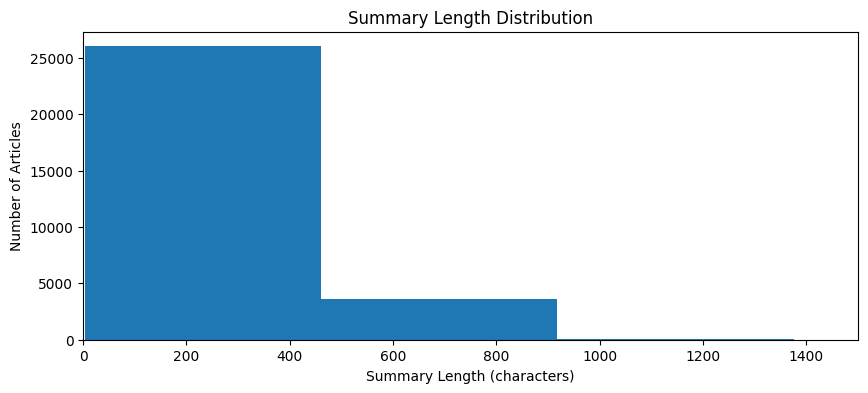

In [6]:
df["summary_len"] = df["summary"].astype(str).apply(len)
df["title_len"] = df["title"].astype(str).apply(len)

print("📌 Title length:")
print(df["title_len"].describe())

print("\n📄 Summary length:")
print(df["summary_len"].describe())


# Summary length histogram
df["summary_len"].plot(kind="hist", bins=50, title="Summary Length Distribution", figsize=(10, 4), xlim=(0, 1500))
plt.xlabel("Summary Length (characters)")
plt.ylabel("Number of Articles")
plt.show()

📅 Date range: 2020-01-01 00:00:00 → 2025-05-12 00:00:00


<Axes: title={'center': 'Articles per Month'}, xlabel='year_month'>

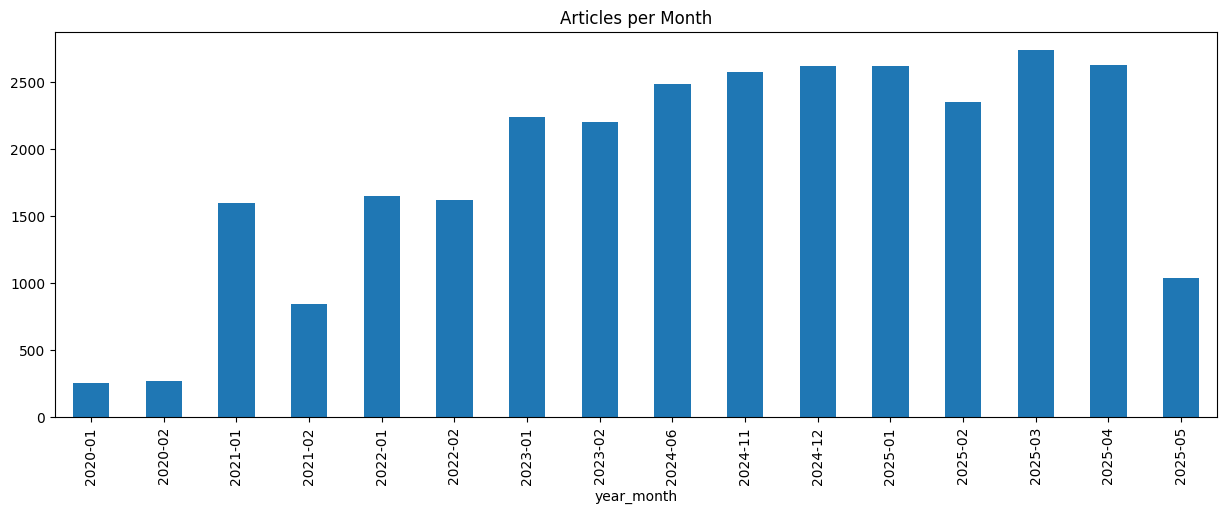

In [7]:
# Convert 'date' to datetime if needed
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Check range
print(f"📅 Date range: {df['date'].min()} → {df['date'].max()}")

# Plot article count by year/month
df["year_month"] = df["date"].dt.to_period("M")
df["year_month"].value_counts().sort_index().plot(kind="bar", figsize=(15,5), title="Articles per Month")


📡 Unique sources: 761
🔝 Top 10 sources by article count:
source
dvidshub                     1583
Post                         1163
lulegacy                     1065
watoday                       836
The Sydney Morning Herald     808
The Age                       755
Metro                         729
dailymail                     656
Mail                          543
brisbanetimes                 529
Name: count, dtype: int64


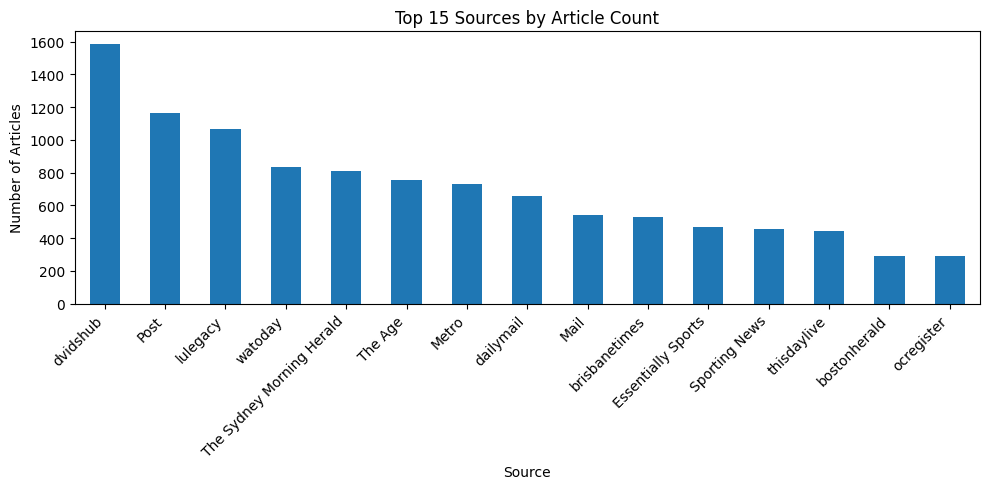


📅 Date range: 2020-01-01 → 2025-05-12


In [8]:
import matplotlib.pyplot as plt

print(f"📡 Unique sources: {df['source'].nunique()}")
print("🔝 Top 10 sources by article count:")
print(df["source"].value_counts().head(10))

plt.figure(figsize=(10, 5))
df["source"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Sources by Article Count")
plt.xlabel("Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df["date"] = pd.to_datetime(df["date"], errors="coerce")
print(f"\n📅 Date range: {df['date'].min().date()} → {df['date'].max().date()}")




🔍 Category Distribution:
category
general          26994
sports            2105
entertainment      233
business           131
politics           125
technology         112
science             24
health              10
Name: count, dtype: int64

✅ Total categories: 8


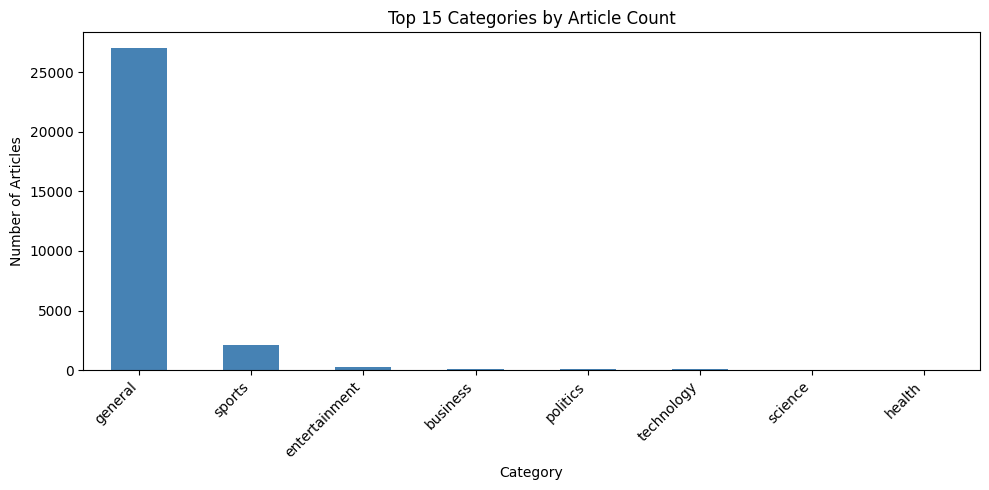

In [ ]:
import matplotlib.pyplot as plt


print("🔍 Category Distribution:")
category_counts = df["category"].value_counts(dropna=False)
print(category_counts)
print("\n✅ Total categories:", df["category"].nunique())

plt.figure(figsize=(10, 5))
category_counts.head(15).plot(kind="bar", color="steelblue")
plt.title("Top 15 Categories by Article Count")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
import matplotlib.pyplot as plt

total_articles = len(df)

# === CATEGORY DISTRIBUTION ===
print("🔍 Category Distribution:")
category_counts = df["category"].value_counts(dropna=False)
category_percent = (category_counts / total_articles * 100).round(2)

category_df = pd.DataFrame({
    "Count": category_counts,
    "Percent": category_percent
})

print(category_df.head(15))


🔍 Category Distribution:
               Count  Percent
category                     
general        26994    90.78
sports          2105     7.08
entertainment    233     0.78
business         131     0.44
politics         125     0.42
technology       112     0.38
science           24     0.08
health            10     0.03
